# TradeSeq 

https://kstreet13.github.io/bioc2020trajectories/articles/workshopTrajectories.html

In [1]:
library_load <- suppressMessages(
    
    list(
        
        # Seurat 
        library(Seurat), 
        
        # Condiment
        library(tradeSeq), 
        library(tradeSeq), 
        library(slingshot), 
        library(condiments), 
        library(SingleCellExperiment), 
        library(clusterExperiment), 
        
        # Data 
        library(tidyverse), 
        
        # Plotting 
        library(ComplexHeatmap), 
        library(circlize), 
        library(viridis), 
        library(ggplotify), 
        library(ComplexUpset), 
        
        # Prallel 
        library(BiocParallel)
        
    )
)

In [2]:
# Options 
options(warn=-1)

In [3]:
# Set working directory to project root
setwd("/research/peer/fdeckert/FD20200109SPLENO")

In [71]:
# Plotting Theme
source("plotting_global.R")
ggplot2::theme_set(theme_global_set(1))

In [72]:
# Parallel computing 
workers <- future::availableCores()
print(workers)

Slurm 
    1 


In [73]:
# Random seed 
random_seed <- 42
set.seed(random_seed)

# Parameter settings and data import 

In [74]:
# Data from workshop GitHub
# devtools::install_github("kstreet13/bioc2020trajectories")
data("sce", package="bioc2020trajectories")

In [75]:
# Slingshot 
sce <- slingshot(sce, reducedDim = 'UMAP', clusterLabels = colData(sce)$pheno$spatial_id, start.clus = 'inner', approx_points = 150)

In [76]:
# Prallel check for workers 
print(future::availableCores())
BPPARAM <- BiocParallel::bpparam()
BPPARAM <- MulticoreParam(workers=future::availableCores()) 

Slurm 
    1 


In [77]:
# TradeSeq 
if (FALSE) {
    
    sce <- fitGAM(sce, conditions=factor(colData(sce)$pheno$treatment_id), nknots=5, parallel=TRUE, BPPARAM=BPPARAM)
    saveRDS(sce, "result/dev/sce.rds")
    
} else {
    
    sce <- readRDS("result/dev/sce.rds")
    
}

# Plot 

In [82]:
options(repr.plot.width=5, repr.plot.height=5)

p_1 <- plotSmoothers(sce, assays(sce)$counts, gene="CDH1", alpha=1, border=TRUE, nPoints=100) + ggtitle("TradeSeq (CDH1)") + theme_global_set(1)

In [99]:
plot_smooth <- function(sce, gene) {
    
    cnt <- assays(sce)$counts[gene, , drop=FALSE]
    cnt <- as.data.frame(t(cnt))
    colnames(cnt) <- "exp"

    pseudotime <- colData(sce)$crv$pseudotime.Lineage1
    condition <- colData(sce)$tradeSeq$conditions

    cnt_smooth <- predictSmooth(sce, gene, nPoints=100, tidy=TRUE)
    cnt_smooth <- cnt_smooth[, c("yhat", "time", "condition")]
    colnames(cnt_smooth) <- c("exp", "pseudotime", "condition")
    
    p <- ggplot(NULL, aes(x=pseudotime, y=log1p(exp), color=condition)) + 
        geom_point(data=cnt, size=1) +
        geom_line(data=cnt_smooth, size=2)
    
    return(p)
    
}

In [100]:
p_2 <- plot_smooth(sce, "CDH1") + ggtitle("Custom (CDH1)")

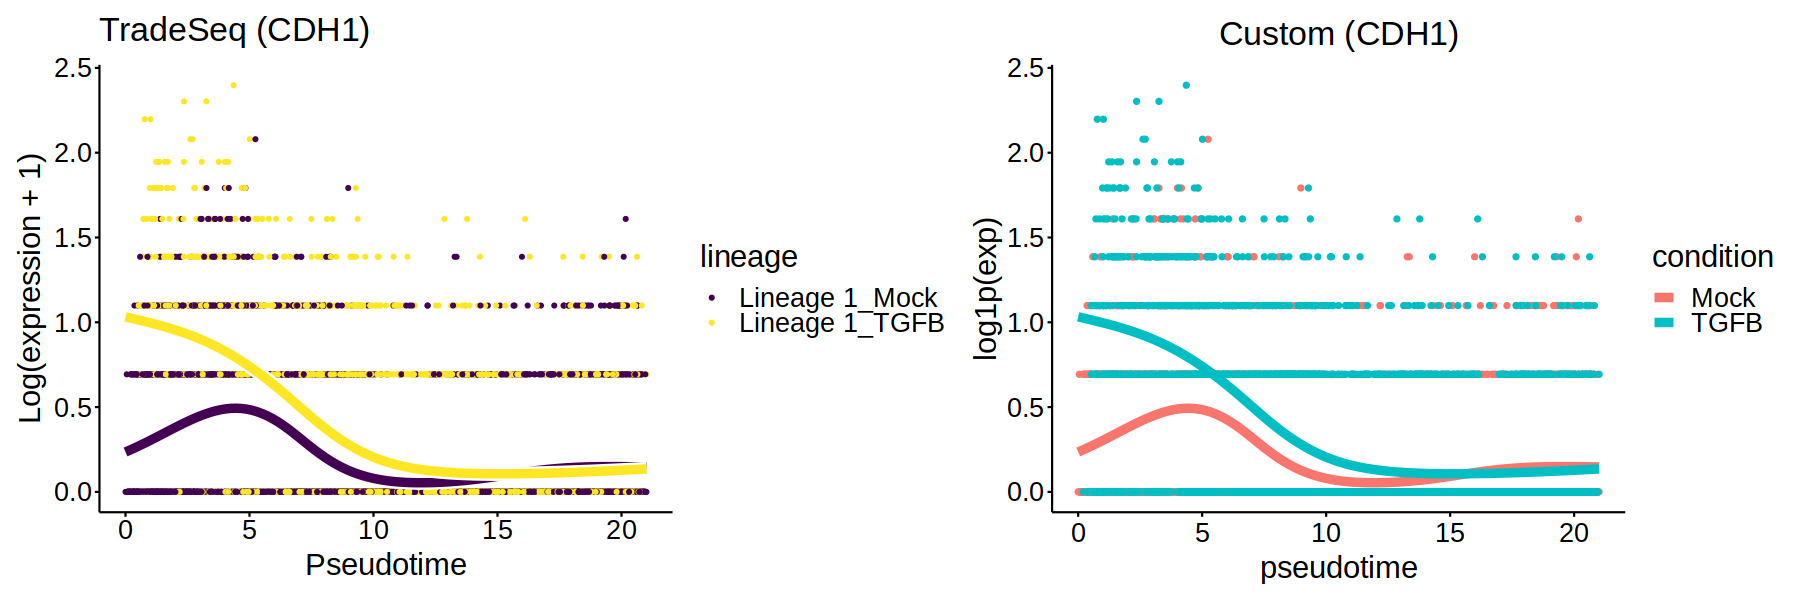

In [101]:
options(repr.plot.width=15, repr.plot.height=5)

p_1 + p_2